# Life Expectancy and GDP project

The idea behind this project is to practice EDA (Eploratory Data Analysis) and data visualisation.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Question to answer:
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**DATA**  for this project from the World Health Organization and the World Bank.


## Import python modules:
Import all necessarry libraries for this project

In [7]:
# data manipulation
import pandas as pd
import numpy as np

# data visualisation
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data
Here we load data from **all_data.csv** file into dataframe called `data` so that we can easily investigate and visualise it.


In [73]:
data = pd.read_csv("all_data.csv")
print(data.head(7))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
5   Chile  2005                              78.4  1.229650e+11
6   Chile  2006                              78.9  1.547880e+11


## Explore the Data
To understand the `data` better. We `shape` it, check the `column` dtypes, read the `summary description` and print out `column` names.

In [75]:
print("Shape of the data: ")
print(data.shape)
print("\nColumn data types:" )
print(data.dtypes)
print("\nData description:")
print(data.describe())
print("\nColumn names:")
print(data.columns)


Shape of the data: 
(96, 4)

Column data types:
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

Data description:
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13

Column names:
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


Dataframe has 4 features:
1. **"Country"** - categorical;
2. **"Year"** - quantative;
3. **"Life expectancy at birth (years)"** - quantative;
4. **"GDP"** - quantative;

The length of our `data` is 96 rows.
There's no need to change `column` data types as they are in formated in tidy manner.

3 of 4 column have 1 word name, while `Life expectancy at birth (years)` is 5 words long. It is descriptive for the axis, but too long for coding. The `rename` function is used to to change the column name into `LE`.

In [79]:
# save column name for axis description
le_description = "Life expectancy at birth (years)"

# renaming column from Life expectancy at birth (years) to LE
data = data.rename({"Life expectancy at birth (years)":"LE"}, axis = "columns")
print(data.head())

  Country  Year    LE           GDP
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6.973681e+10
3   Chile  2003  77.9  7.564346e+10
4   Chile  2004  78.0  9.921039e+10


#### WHERE ARE HOLES IN OUR DATA??
Search for possible missing values.

<AxesSubplot:>

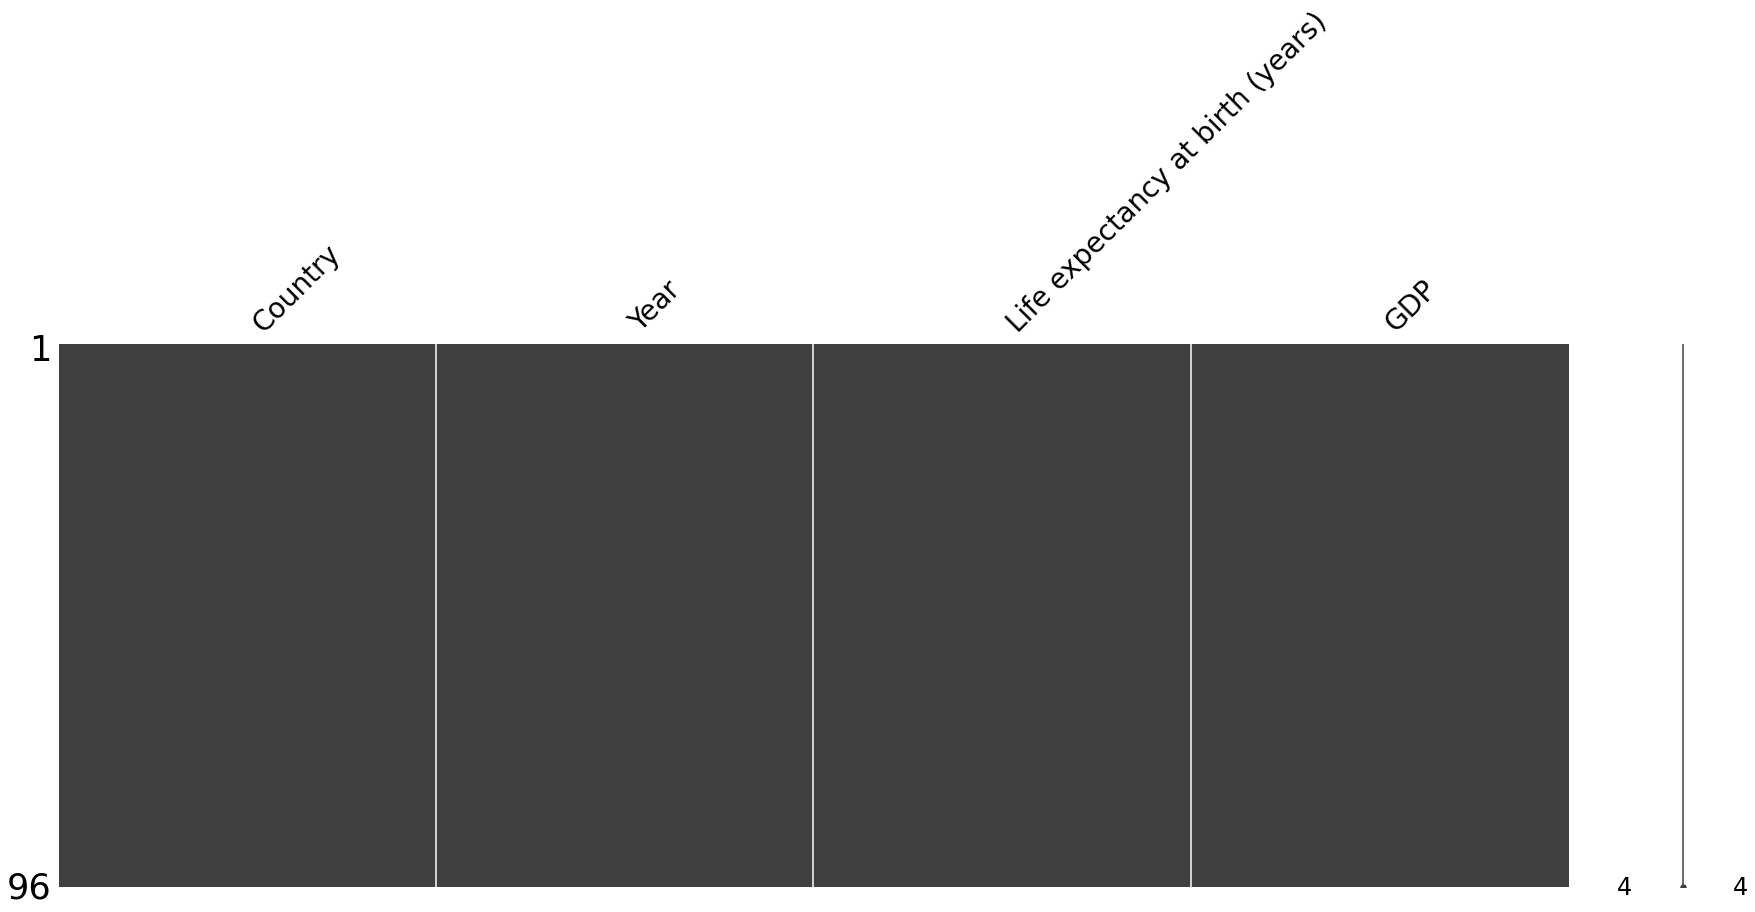

In [18]:
# Plotting graphic with missing values
missingno.matrix(data, figsize = (30,10), fontsize = 28, color = (0.25, 0.25, 0.25))

There are **no missing values** in this dataset.

Dataset is tidy and ready for **_EDA_**.


## EXPLORATORY DATA  ANALYSIS:
Let's explore each feature individually

In [38]:
# checking unique countries
countries = data.Country.unique()
print("Unique countries in this dataset: ")
print(countries)

Unique countries in this dataset: 
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


There are 6 different countries in the `data`.  

Next, find out which years are represented in the `data`.

In [77]:
# checking unique year
print(data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


We can see that `data` is represented from 2000 to 2015.

#### Distribution of LE

Plotting the distribution of `LE` feature. The distribution is **left** skewed, most of the data are on the right side.

Text(0.5, 8.95999999999998, 'Life expectancy at birth (years)')

<Figure size 720x432 with 0 Axes>

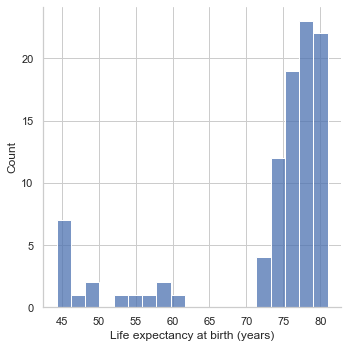

In [87]:
plt.figure(figsize=(10,6))
sns.displot(data.LE, kde = False)
plt.xlabel(le_description)


#### Distribution of GDP
Plotting the distribution of `GDP` feature. The distribution is **right** skewed, most of the data are on left side of the plot.

<Figure size 720x432 with 0 Axes>

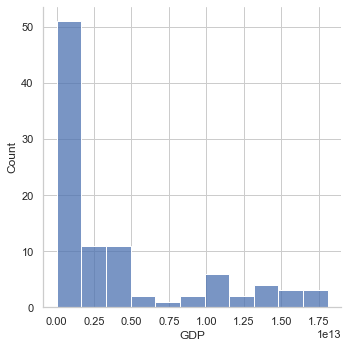

In [96]:
plt.figure(figsize=(10,6))
sns.displot(data.GDP, kde = False)

### Country by Country
Break data country by country to find averages of `LE` and `GDP` of each country.


In [92]:
# create new df of countries LE and GDP average values
country_avg = data.drop("Year", axis = 1).groupby("Country").mean().sort_values(
    by = ["GDP", "LE"],ascending=False).reset_index()
print(country_avg)

                    Country        LE           GDP
0  United States of America  78.06250  1.407500e+13
1                     China  74.26250  4.957714e+12
2                   Germany  79.65625  3.094776e+12
3                    Mexico  75.71875  9.766506e+11
4                     Chile  78.94375  1.697888e+11
5                  Zimbabwe  50.09375  9.062580e+09


New data-frame shows that USA is the country with the highest `GDP`, while Germany - highest `LE`.
It also explains the **left** skewness of `LE` column, Zimbabwe has average `LE` of around 50 years, while other countries varies from 74 to 78 years.

Plotting bar plots will help to visually see the differences in these features.

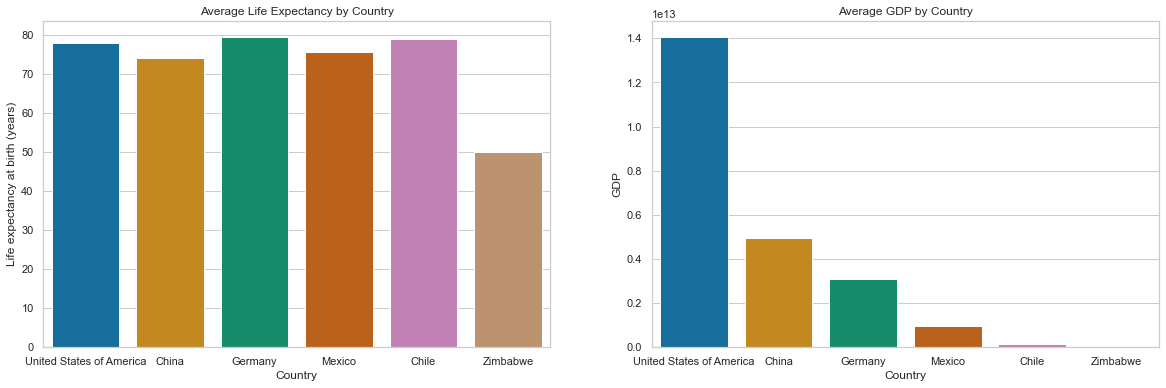

In [120]:
fig, ax = plt.subplots(1,2, figsize = (20,6))
sns.barplot(x="Country", y="LE", data=country_avg, ax=ax[0], palette = "colorblind")
ax[0].set_ylabel(le_description)
ax[0].set_title("Average Life Expectancy by Country")
sns.barplot(x="Country", y="GDP", data=country_avg, ax=ax[1], palette = "colorblind")
ax[1].set_title("Average GDP by Country");



Using these plots we can easily identify that `USA` has the highest average `GDP` while `Zimbabwe` is even hardly visible.

Another way to visualise distribution is **boxplots**.

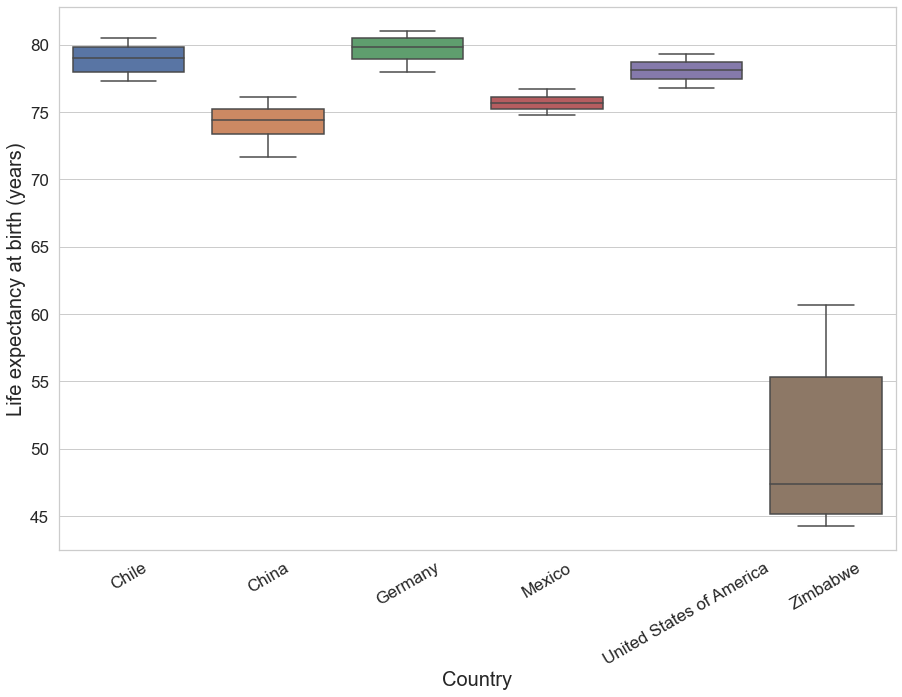

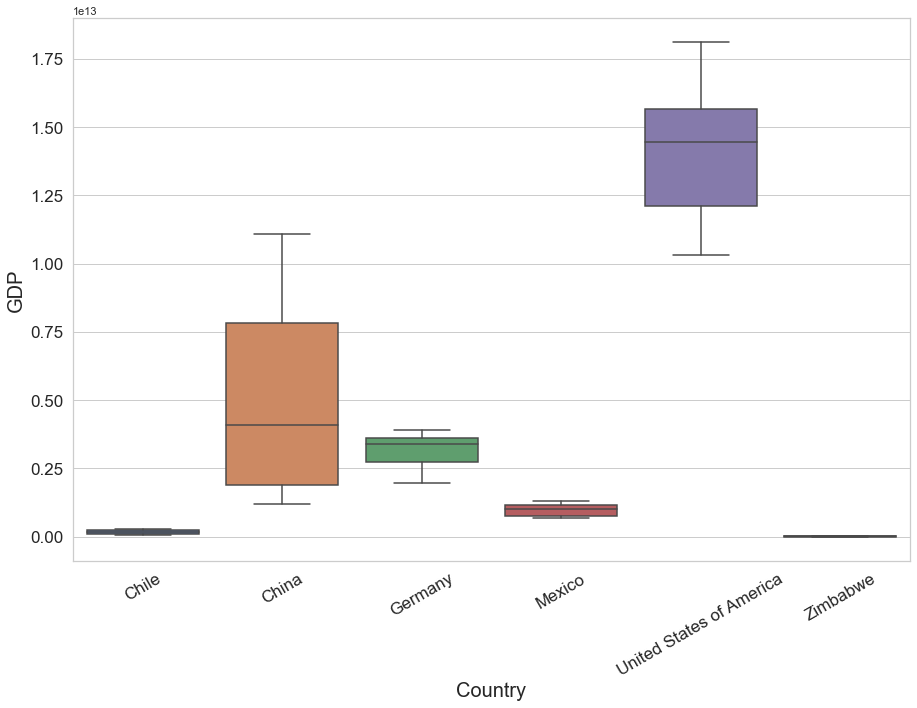

In [179]:
# Country vs LE boxplot
fig= plt.subplots(figsize = (15,10))
a= sns.boxplot(x="Country", y="LE", data=data)
a.tick_params(labelsize=17)
a.set_ylabel(le_description,fontsize=20)
a.set_xlabel("Country", fontsize=20)
plt.xticks(rotation=30);

# Country vs GDP boxplot
fig= plt.subplots(figsize = (15,10))
b= sns.boxplot(x="Country", y="GDP", data= data)
b.tick_params(labelsize=17)
b.set_ylabel("GDP", fontsize=20)
b.set_xlabel("Country", fontsize=20)
plt.xticks(rotation=30);


Boxplot shows distribution of average `LE` of each country.
`Zimbabwe` has biggest spread of average `LE`, while other countries have shorter ranges.

`GDP` boxplot show that `USA` and `China` has biggest spread of GDP.


## GDP and LE over time by Country
To take a closer look, how `GDP` and `LE` changed for each of the countries over time, line plots comes for help.


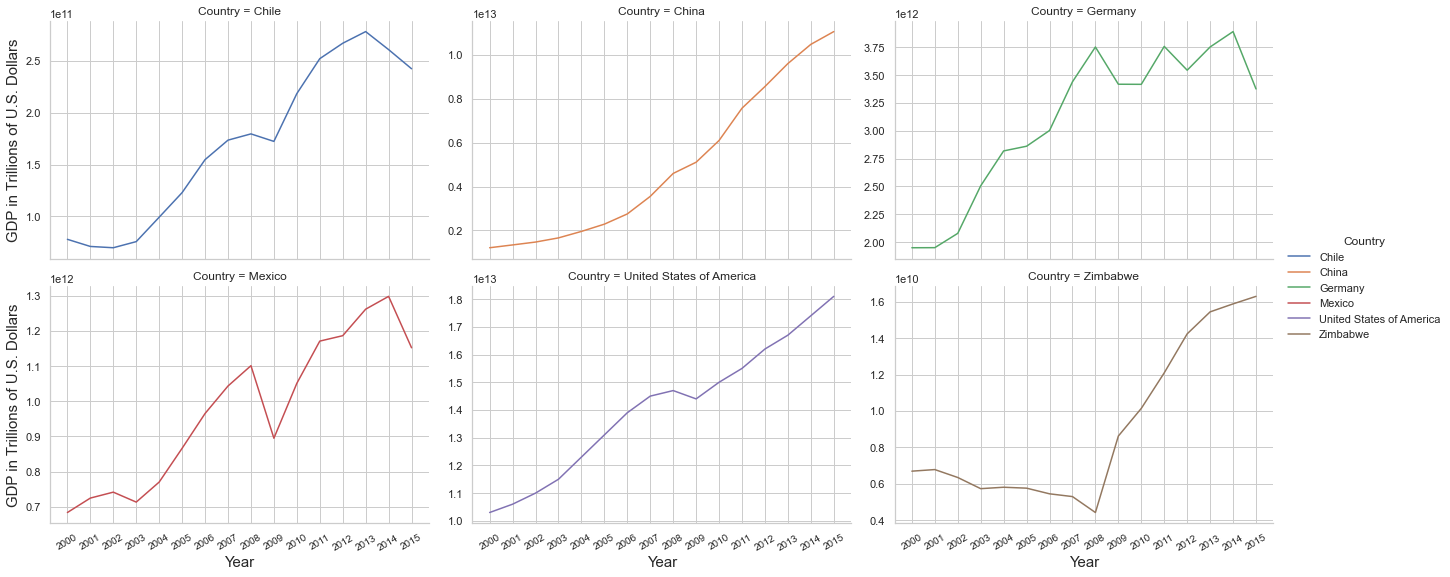

In [206]:
# GDP over time for each of the countries
year = range(2000, 2016)
graphGDP = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, aspect = 1.5, height = 4)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars", size = 15))
graphGDP.set(xticks= year)

for ax in graphGDP.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_size(10)
graphGDP;

`GDP` increased over years 2000 to 2015 for every country. Chile, Mexico, Zimbabwe faced drops in `GDP` during 2007 - 2009 period, which was due to global economy crysis.

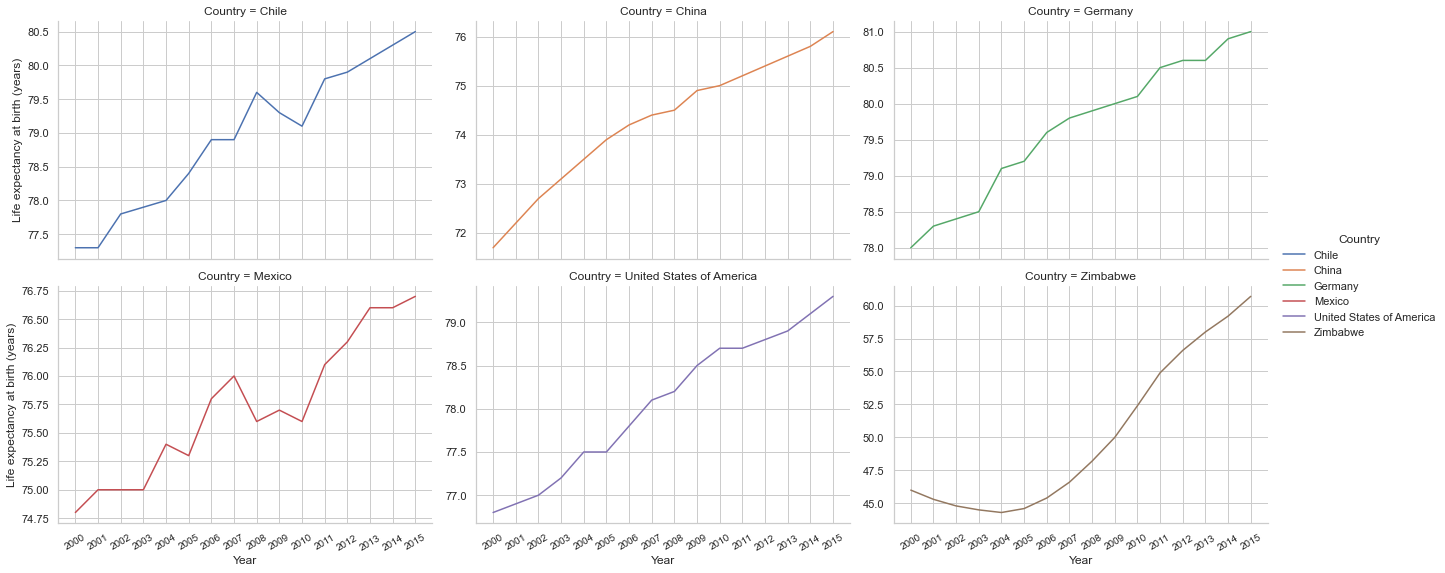

In [218]:
# LE over time for each of the countries
graphGDP = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, aspect = 1.5, height = 4)

graphGDP = (graphGDP.map(sns.lineplot,"Year","LE")
         .add_legend()
         .set_axis_labels("Year",le_description, size = 12))
graphGDP.set(xticks= year)
for ax in graphGDP.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_size(10)
graphGDP;

`LE` increased for every country from 2000 to 2015. Zimbabwe shows biggest raise of average `LE` after slight dip from 2000 to 2004.

## Correlation between LE and GDP
Creating correlation matrix, to see if there is correlation between `LE` and `GDP`

In [222]:
# correlation matrix
corr = data.corr(method='pearson')
print(corr)

          Year        LE       GDP
Year  1.000000  0.155050  0.208288
LE    0.155050  1.000000  0.343207
GDP   0.208288  0.343207  1.000000


Correlation between `LE` and `GDP` is 0.34, which indicates positive linear association. 

## CONCLUSIONS

The data helped to practice `EDA` concepts and data visualisation methods.

It helped to answer question raised at the beginning of the project:
- Has life expectancy increased over time in the six nations?
    - Yes, with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.
